In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import random_walk
import updaters

In [2]:
def getFeatures(state):
    if state==0 or state==1001:
        return np.zeros((10,1))
    index = int((state-1)/100)
    features = np.zeros((10,1))
    features[index]=1
    return features

In [3]:
mdp = random_walk.randomWalk()

In [4]:
weights = np.array([random.uniform(-1,1)for i in range(10)]).reshape((10,1))

In [5]:
pastWeights = [weights]

In [6]:
updater = updaters.OffPolicyTD(0.01,1.0,10)

In [7]:
stepCount = 10000000
state = mdp.getStartState()
newFeatures = getFeatures(state)

In [8]:
for i in range(stepCount):
    oldFeatures = newFeatures
    state,reward = mdp.getTransition(state)
    newFeatures = getFeatures(state)
    weights=updater.update(reward,weights,oldFeatures,newFeatures,1.0)
    pastWeights.append(weights)
    if state == 0 or state == 1001:
        state = mdp.getStartState()
        newFeatures = getFeatures(state)


In [9]:
pastWeights=np.array(pastWeights)

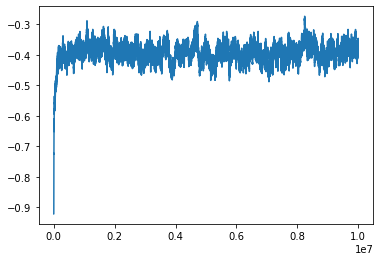

In [10]:
plt.plot(range(stepCount+1),pastWeights[:,0])

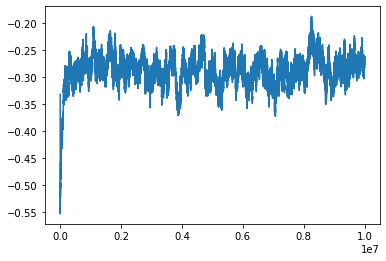

In [11]:
plt.plot(range(stepCount+1),pastWeights[:,1])

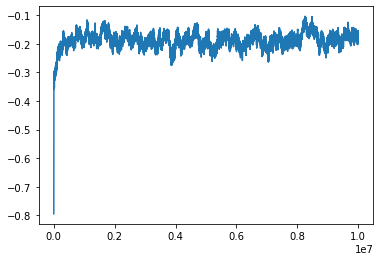

In [12]:
plt.plot(range(stepCount+1),pastWeights[:,2])

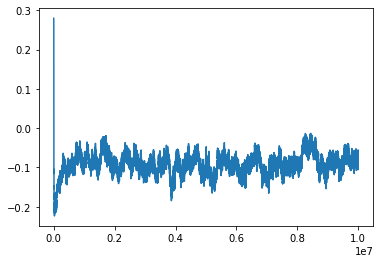

In [13]:
plt.plot(range(stepCount+1),pastWeights[:,3])

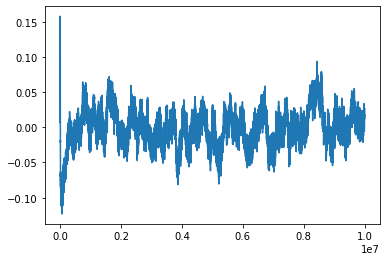

In [14]:
plt.plot(range(stepCount+1),pastWeights[:,4])

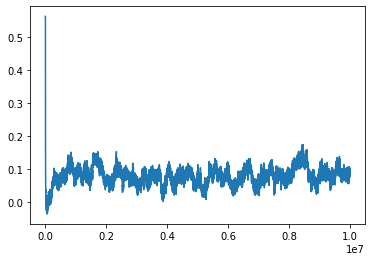

In [15]:
plt.plot(range(stepCount+1),pastWeights[:,5])

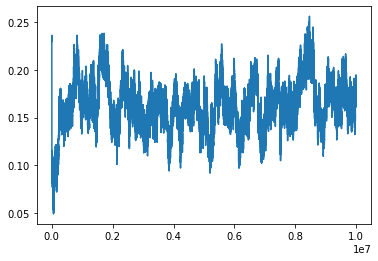

In [16]:
plt.plot(range(stepCount+1),pastWeights[:,6])

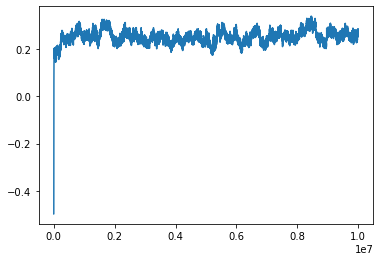

In [17]:
plt.plot(range(stepCount+1),pastWeights[:,7])

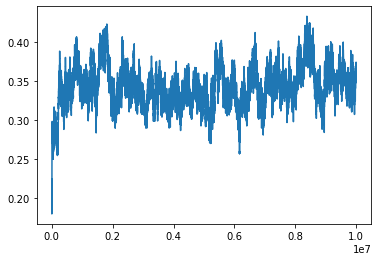

In [18]:
plt.plot(range(stepCount+1),pastWeights[:,8])

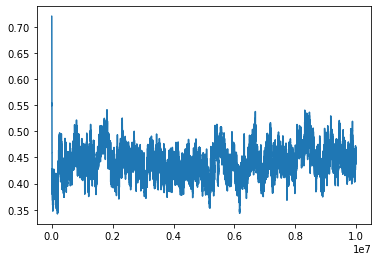

In [19]:
plt.plot(range(stepCount+1),pastWeights[:,9])

In [20]:
values = [np.matmul(np.transpose(getFeatures(i)),pastWeights[-1])[0] for i in range(1,1001)]

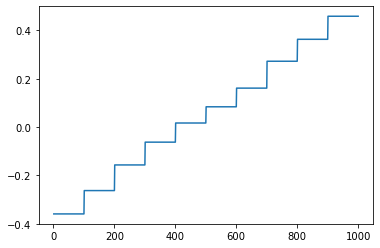

In [21]:
plt.plot(range(1,1001),values)